In [25]:
#Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing and cleaning
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#Feature Selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

#Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#Evaluation
from sklearn.metrics import classification_report

#Warnings
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('data.csv')

In [27]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [28]:
df.shape

(50553, 12)

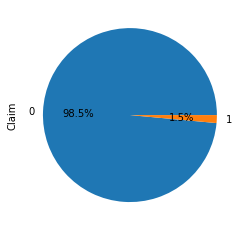

In [29]:
df["Claim"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

### Preprocessing and Cleaning

In [30]:
#Remove unwanted column
df.drop("ID", axis=1, inplace=True)

In [31]:
#Check null values
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                50553 non-null  object 
 1   Agency Type           50553 non-null  object 
 2   Distribution Channel  50553 non-null  object 
 3   Product Name          50553 non-null  object 
 4   Claim                 50553 non-null  int64  
 5   Duration              50553 non-null  int64  
 6   Destination           50553 non-null  object 
 7   Net Sales             50553 non-null  float64
 8   Commision (in value)  50553 non-null  float64
 9   Gender                14600 non-null  object 
 10  Age                   50553 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.2+ MB


In [33]:
df["Gender"].fillna("unavailable",inplace=True)

In [34]:
df["Claim"]=df["Claim"].astype(object)

In [35]:
#Seperating categorical and numerical data
df_cat = df.select_dtypes('object')
df_num = df.select_dtypes(['int64','float64'])

In [36]:
df_cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Destination,Gender
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,MALAYSIA,unavailable
1,EPX,Travel Agency,Online,Cancellation Plan,0,SINGAPORE,unavailable
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,MALAYSIA,unavailable
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,INDONESIA,unavailable
4,EPX,Travel Agency,Online,Cancellation Plan,0,"KOREA, REPUBLIC OF",unavailable


Agency


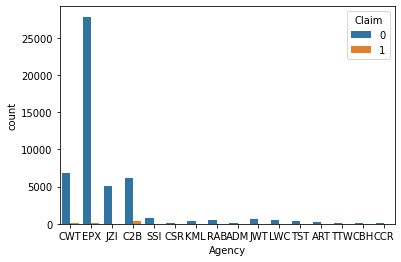

Agency Type


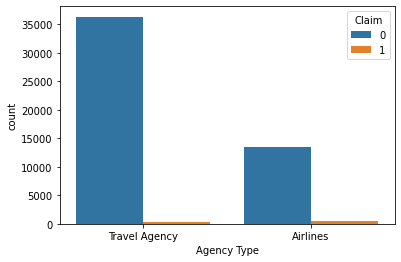

Distribution Channel


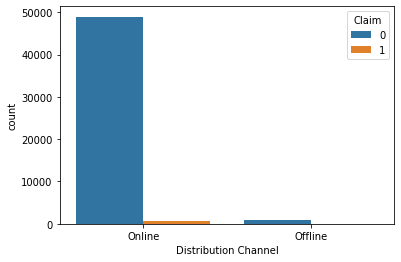

Product Name


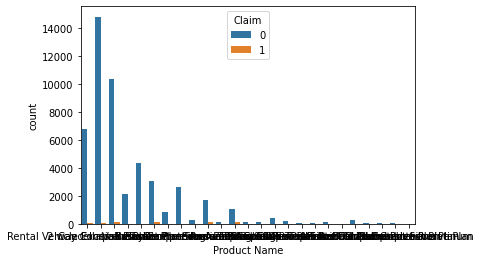

Claim


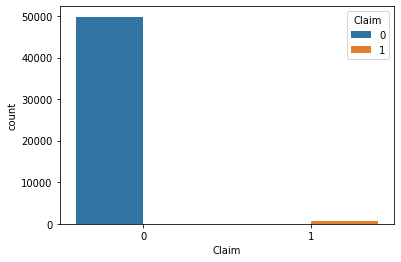

Destination


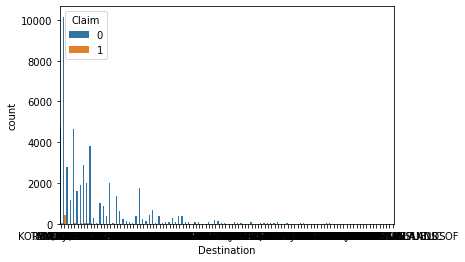

Gender


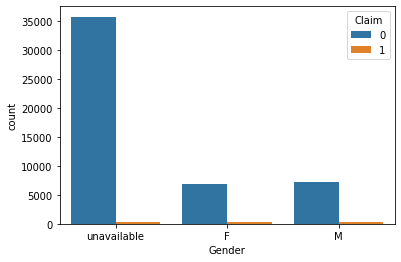

In [37]:
for col in df_cat:
  print(col)
  plt.figure()
  sns.countplot(data=df_cat, x=col, hue="Claim")
  plt.show()

In [38]:
#Encoding Categorical data
le = LabelEncoder()
for col in df_cat:
  df_cat[col] = le.fit_transform(df_cat[col])

In [39]:
df_cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Destination,Gender
0,6,1,1,16,0,56,2
1,7,1,1,10,0,79,2
2,6,1,1,16,0,56,2
3,7,1,1,1,0,38,2
4,7,1,1,10,0,47,2


Duration
22.872063891229274


<Figure size 432x288 with 0 Axes>

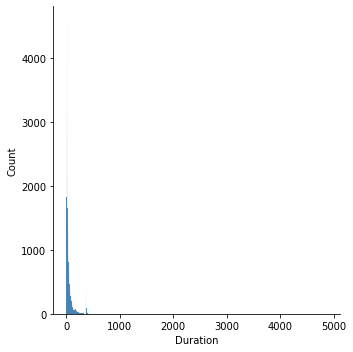

Net Sales
3.3281441910342053


<Figure size 432x288 with 0 Axes>

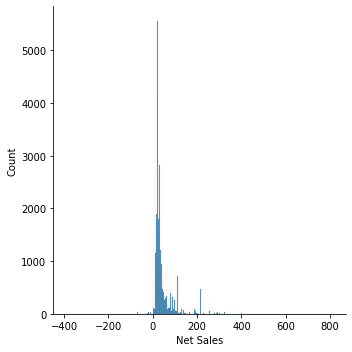

Commision (in value)
4.0780684356634636


<Figure size 432x288 with 0 Axes>

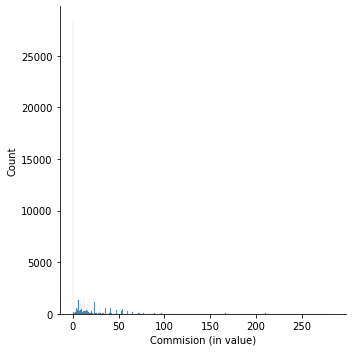

Age
2.9783898494112435


<Figure size 432x288 with 0 Axes>

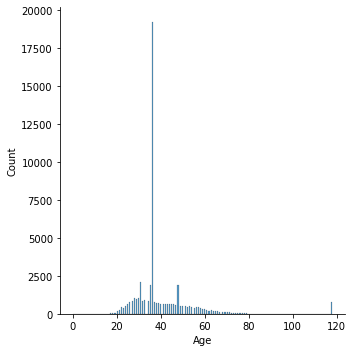

In [40]:
for col in df_num:
  print(col)
  print(skew(df_num[col]))
  plt.figure()
  sns.displot(df_num[col])
  plt.show()

In [41]:
#Merging categorical and numerical data
df_new = pd.concat([df_num, df_cat],axis=1)

In [42]:
df_new.head()

,Duration,Net Sales,Commision (in value),Age,Agency,Agency Type,Distribution Channel,Product Name,Claim,Destination,Gender
0,7,0.0,17.82,31,6,1,1,16,0,56,2
1,85,69.0,0.00,36,7,1,1,10,0,79,2
2,11,19.8,11.88,75,6,1,1,16,0,56,2
3,16,20.0,0.00,32,7,1,1,1,0,38,2
4,10,15.0,0.00,29,7,1,1,10,0,47,2


In [43]:
def create_model(model, X_train, X_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))
  return model

In [44]:
#Preparing for training
X = df_new.drop("Claim", axis=1)
y = df_new["Claim"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =1)

## Baseline Model

In [46]:
lr = LogisticRegression()

In [47]:
create_model(lr,X_train,X_test)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14961
           1       0.00      0.00      0.00       205

    accuracy                           0.99     15166
   macro avg       0.49      0.50      0.50     15166
weighted avg       0.97      0.99      0.98     15166



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Under sampling

In [48]:
from imblearn.under_sampling import RandomUnderSampler

In [49]:
rus = RandomUnderSampler(random_state=1)

In [50]:
X_sample1, y_sample1 = rus.fit_sample(X_train,y_train)

In [51]:
pd.Series(y_sample1).value_counts()

1    536
0    536
dtype: int64

In [52]:
lr2 = LogisticRegression()
lr2.fit(X_sample1, y_sample1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
y_pred2 = lr2.predict(X_test)

In [54]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90     14961
           1       0.05      0.62      0.09       205

    accuracy                           0.83     15166
   macro avg       0.52      0.72      0.50     15166
weighted avg       0.98      0.83      0.89     15166



### Decision Tree Under sampling

In [55]:
dt1 = DecisionTreeClassifier()

In [56]:
dt1.fit(X_sample1,y_sample1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [57]:
y_pred = dt1.predict(X_test)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.67      0.80     14961
           1       0.03      0.67      0.05       205

    accuracy                           0.67     15166
   macro avg       0.51      0.67      0.43     15166
weighted avg       0.98      0.67      0.79     15166



### Decision Tree with max_depth=8

In [59]:
dt2 = DecisionTreeClassifier(max_depth=8)

In [60]:
dt2.fit(X_sample1,y_sample1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [61]:
y_pred_1 = dt2.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.99      0.72      0.84     14961
           1       0.03      0.71      0.07       205

    accuracy                           0.72     15166
   macro avg       0.51      0.72      0.45     15166
weighted avg       0.98      0.72      0.83     15166



### Random Forest Classifier with max_depth=8

In [63]:
rf = RandomForestClassifier(max_depth=8)

In [64]:
rf.fit(X_sample1,y_sample1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
y_pred_rf = rf.predict(X_test)

In [66]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87     14961
           1       0.04      0.69      0.07       205

    accuracy                           0.77     15166
   macro avg       0.52      0.73      0.47     15166
weighted avg       0.98      0.77      0.86     15166



### Random Forest Classifier with max_features=7

In [67]:
rf_f = RandomForestClassifier(max_features=7, random_state=1)

In [68]:
rf_f.fit(X_sample1,y_sample1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [69]:
y_pred_rf_f = rf_f.predict(X_test)

In [70]:
print(classification_report(y_test, y_pred_rf_f))

              precision    recall  f1-score   support

           0       0.99      0.72      0.84     14961
           1       0.03      0.73      0.07       205

    accuracy                           0.72     15166
   macro avg       0.51      0.72      0.45     15166
weighted avg       0.98      0.72      0.83     15166



### VotingClassifier

In [71]:
from sklearn.ensemble import VotingClassifier

In [72]:
lr_v = LogisticRegression()
dt_v = DecisionTreeClassifier()
dt_v = DecisionTreeClassifier(criterion="entropy")

In [73]:
model_list = [("Logistic", lr_v), ("Decision",dt_v), ("Decision_entropy", dt_v)]

In [74]:
vc = VotingClassifier(estimators=model_list)

In [75]:
vc.fit(X_sample1,y_sample1)

VotingClassifier(estimators=[('Logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Decision',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     crite...
                              DecisionTr

In [76]:
y_pred_v = vc.predict(X_test)

In [77]:
print(classification_report(y_test, y_pred_v))

              precision    recall  f1-score   support

           0       0.99      0.68      0.81     14961
           1       0.03      0.67      0.05       205

    accuracy                           0.68     15166
   macro avg       0.51      0.68      0.43     15166
weighted avg       0.98      0.68      0.80     15166



### ADA Boosting

In [78]:
ada = AdaBoostClassifier(n_estimators=100)

In [79]:
ada.fit(X_sample1,y_sample1)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [80]:
y_pred_ada = ada.predict(X_test)

In [81]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.99      0.75      0.86     14961
           1       0.04      0.68      0.07       205

    accuracy                           0.75     15166
   macro avg       0.52      0.72      0.46     15166
weighted avg       0.98      0.75      0.85     15166



### SVM

In [82]:
lsv = LinearSVC(random_state=1)

In [83]:
lsv.fit(X_sample1,y_sample1)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [84]:
y_pred_lsv = lsv.predict(X_test)

In [85]:
print(classification_report(y_test, y_pred_lsv))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14961
           1       0.11      0.20      0.14       205

    accuracy                           0.97     15166
   macro avg       0.55      0.59      0.56     15166
weighted avg       0.98      0.97      0.97     15166



### Kernel functions

In [86]:
svc1 = SVC(random_state=1,kernel="rbf")

In [87]:
svc1.fit(X_sample1,y_sample1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [88]:
y_pred_svc1 = svc1.predict(X_test)

In [89]:
print(classification_report(y_test, y_pred_svc1))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     14961
           1       0.04      0.57      0.07       205

    accuracy                           0.79     15166
   macro avg       0.51      0.68      0.48     15166
weighted avg       0.98      0.79      0.87     15166



### Over sampling

In [90]:
from imblearn.over_sampling import RandomOverSampler

In [91]:
ros = RandomOverSampler(random_state=1)

In [92]:
X_sample2, y_sample2 = ros.fit_sample(X_train,y_train)

In [93]:
pd.Series(y_sample2).value_counts()

1    34851
0    34851
dtype: int64

In [94]:
lr3 = LogisticRegression()
lr3.fit(X_sample2, y_sample2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
y_pred3= lr3.predict(X_test)

In [96]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.83      0.91     14961
           1       0.05      0.62      0.09       205

    accuracy                           0.83     15166
   macro avg       0.52      0.73      0.50     15166
weighted avg       0.98      0.83      0.90     15166



#### Decision Tree with RandomOverSampler

In [97]:
dt3 = DecisionTreeClassifier()

In [98]:
dt3.fit(X_sample2, y_sample2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [99]:
y_pred_dt = dt3.predict(X_test)

In [100]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14961
           1       0.06      0.06      0.06       205

    accuracy                           0.97     15166
   macro avg       0.52      0.52      0.52     15166
weighted avg       0.97      0.97      0.97     15166



In [101]:
dt4 = DecisionTreeClassifier(max_depth=8)

In [102]:
dt4.fit(X_sample2, y_sample2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [103]:
y_pred_dt4 = dt4.predict(X_test)

In [104]:
print(classification_report(y_test,y_pred_dt4))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87     14961
           1       0.04      0.63      0.07       205

    accuracy                           0.77     15166
   macro avg       0.51      0.70      0.47     15166
weighted avg       0.98      0.77      0.86     15166



### Random Forest Classifier with max_depth=6

In [105]:
rf_ov = RandomForestClassifier(max_depth=6)

In [106]:
rf_ov.fit(X_sample2, y_sample2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
y_pred_rf_ov = rf_ov.predict(X_test)

In [108]:
print(classification_report(y_test, y_pred_rf_ov))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     14961
           1       0.05      0.63      0.09       205

    accuracy                           0.84     15166
   macro avg       0.52      0.74      0.50     15166
weighted avg       0.98      0.84      0.90     15166



### Random Forest Classifier with max_features=7

In [109]:
rf_f_ov = RandomForestClassifier(max_features=7, random_state=1)

In [110]:
rf_f_ov.fit(X_sample2, y_sample2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [111]:
y_pred_rf_f_ov = rf_f_ov.predict(X_test)

In [112]:
print(classification_report(y_test, y_pred_rf_f_ov))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14961
           1       0.07      0.04      0.06       205

    accuracy                           0.98     15166
   macro avg       0.53      0.52      0.52     15166
weighted avg       0.97      0.98      0.98     15166



### VotingClassifier

In [113]:
from sklearn.ensemble import VotingClassifier

In [114]:
lr_v1 = LogisticRegression()
dt_v1 = DecisionTreeClassifier()
dt_v1 = DecisionTreeClassifier(criterion="entropy")

In [115]:
model_list1 = [("Logistic", lr_v1), ("Decision",dt_v1), ("Decision_entropy", dt_v1)]

In [116]:
vc_ov = VotingClassifier(estimators=model_list1)

In [117]:
vc_ov.fit(X_sample2, y_sample2)

VotingClassifier(estimators=[('Logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Decision',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     crite...
                              DecisionTr

In [118]:
y_pred_v_ov = vc_ov.predict(X_test)

In [119]:
print(classification_report(y_test, y_pred_v_ov))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     14961
           1       0.05      0.06      0.05       205

    accuracy                           0.97     15166
   macro avg       0.52      0.52      0.52     15166
weighted avg       0.97      0.97      0.97     15166



### ADA Boosting

In [120]:
ada_ov = AdaBoostClassifier(n_estimators=100)

In [121]:
ada_ov.fit(X_sample2, y_sample2)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [122]:
y_pred_ada_ov = ada_ov.predict(X_test)

In [123]:
print(classification_report(y_test, y_pred_ada_ov))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     14961
           1       0.04      0.64      0.08       205

    accuracy                           0.79     15166
   macro avg       0.52      0.72      0.48     15166
weighted avg       0.98      0.79      0.87     15166



### SVM

In [124]:
lsv_ov = LinearSVC(random_state=1)

In [125]:
lsv_ov.fit(X_sample2,y_sample2)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [126]:
y_pred_lsv_ov = lsv_ov.predict(X_test)

In [127]:
print(classification_report(y_test, y_pred_lsv_ov))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89     14961
           1       0.03      0.38      0.05       205

    accuracy                           0.80     15166
   macro avg       0.51      0.59      0.47     15166
weighted avg       0.98      0.80      0.88     15166



## ***Conclusion:*** As recall was more important than precision in this case, so after trying with models I got the best results of recall which is 0.73 with Random Forest Classifier with max_features=7 (rf_f) model after applying UNDERSAMPLER on data.